# Developers Lightning Talk 2017-03-30

## DataScience Swiss Army Knife

I do a lot of data exploration and one-of-a-kind analysis for scientific exploration, quality control, publication.  This involves linking the raw data that EcoFOCI acquires from field operations, to data from other resources and making them consistently available to the internal/external community.  

I share directed results, pilot data analysis routines, and develop qc operating procedures for our suite of oceanographic instrumentation.

So I see myself more as a data scientist than a developer.  And I do a lot of glueing together of packages/routines/programs/data to provide whatever I can for the PMEL/EcoFOCI/FOCI community.

## Existing Challenge

Data science, data analysis, plotting and synthesis of data is a rapidly expanding field.  Its easy to get settled in a workflow that is optimum for a while (with a large amount of invested time) and then not evolve to new workflows due to the spinup time required.  

Questions I hear often:
- I know Python is popular but I don't know where to get started?
- Is Python as good as {familiar utility} for doing {specific task}?
- How did you learn to do this?
- Can you plot or take a look at this data and let me know what you think?

## Purpose for talk

I want to introduce my skills to the PMEL community and provide the framework from where I start when it comes to analysis requests.  I dabble in a wide variety of computer services / development tools and want to learn what other tools and workflows are being developed for data/scientific analysis.

This isn't a tutorial for first time python users (there are plenty on the web) nor is it a step by step set of instructions for installation and usage of the parts.

## A Basic Python Framework/Installation for data exploration in EcoFOCI

### Python Environment


The Anaconda Python Scientific Package found here [Continuum Anaconda Download](https://store.continuum.io/cshop/anaconda/) which comes preloaded with most of the scientific and data oriented python utilities that one needs to get started.  Its strength is also a simple and straightforward integrated package management utilitity (Conda).   

It is available for Windows, Mac, and OSX, can be installed locally (admin not necessary) and is available for python 2 and/or python 3 (and both flavors can be installed simultaneously on the same system without conflicts)

#### Expand Conda's knowledge of updates by including other "channels"

Continnum vets the packages that they include in their update channel... consider it a "stable release" channel.  However, many useful packages are maintained by the community and are stable or stable enough that you want to use them Continuum just doesn't have the time/manpower to vet these packages.

The [conda-forge channel](https://conda-forge.github.io/) is the first additional channel I would link to (there are others that are worthwhile too)

From the command line: update conda settings as follows:   
`conda config --add channels conda-forge`


### Additional Useful Python Packages

- `conda install xarray netcdf4`   
- `conda install gsw seawater`   

### Reading the data

Pandas -> csv/excel   
Xarray -> netcdf (not EPIC aware but can handle epic files)   

### Example using NOAA HRES OI V2 SST Data (Netcdf)

In [1]:
%matplotlib inline

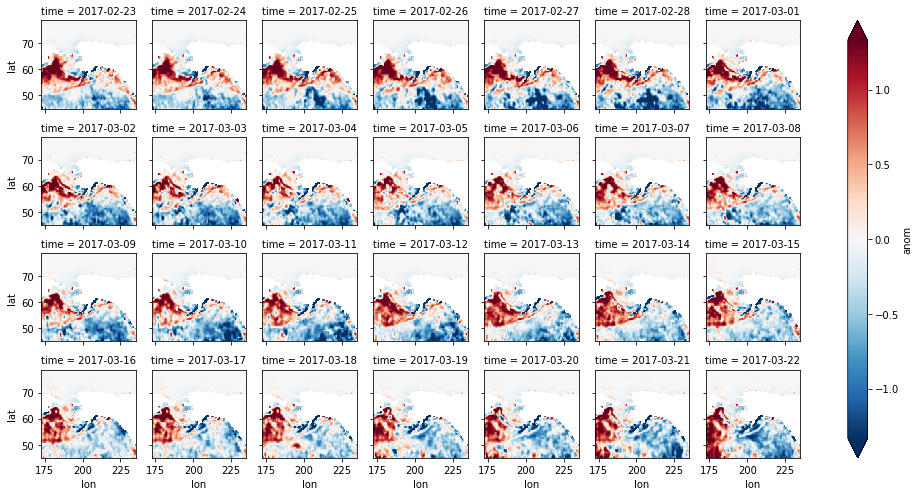

In [9]:
import xarray as xa
import cmocean

filename = 'data/sst.day.anom.2017.v2.nc'
cmap = cmocean.cm.thermal

with xa.open_dataset(filename) as xadf:
    pd = xadf.isel(time=slice(-28,None), lat=slice(-180,-45), lon=slice(-750,-500)) #last four weeks
    facet = pd['anom'].plot(x='lon', y='lat', col='time', col_wrap=7,robust=True,figsize=(14,7))

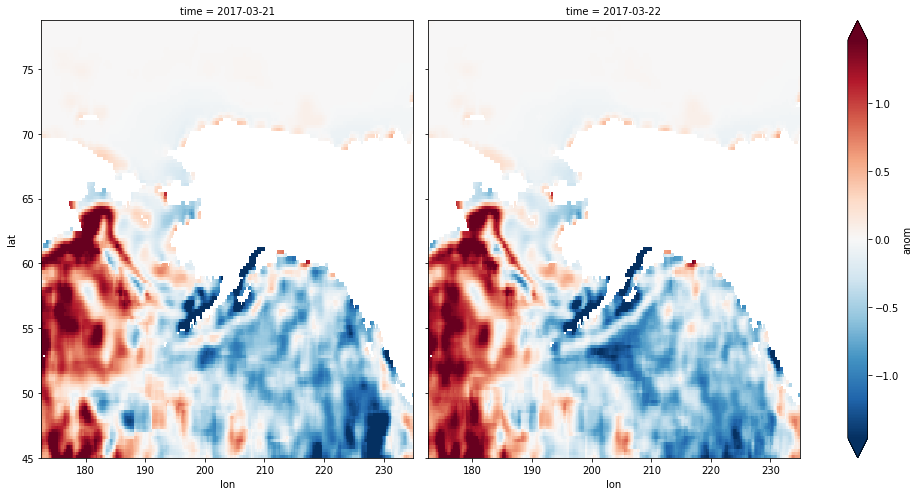

In [12]:
with xa.open_dataset(filename) as xadf:
    pd = xadf.isel(time=slice(-2,None), lat=slice(-180,-45), lon=slice(-750,-500)) #last two days
    facet = pd['anom'].plot(x='lon', y='lat', col='time',robust=True,figsize=(14,7))

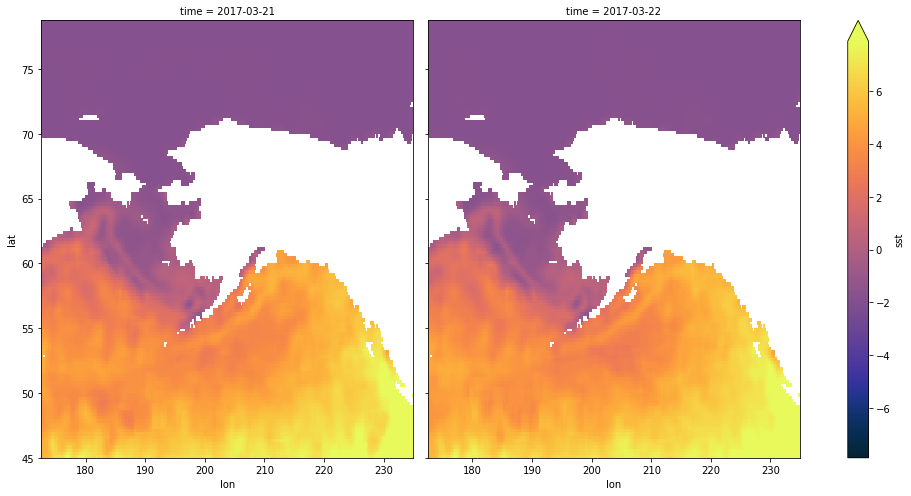

In [17]:
#or from opendap
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.2017.v2.nc'
with xa.open_dataset(threddspath) as xadf:
    pd = xadf.isel(time=slice(-2,None), lat=slice(-180,-45), lon=slice(-750,-500)) #last two days
    facet = pd['sst'].plot(x='lon', y='lat', col='time',robust=True,figsize=(14,7),cmap=cmap)